# Group members :

Nupoor Kumbhar 2351355 ,
Kunduru Neha Sivatmika 2351359 ,
Vamshi Krishna Madhavan 2344937 ,
Bala vamsi Maddineni 2352004

# Part 1 (a)

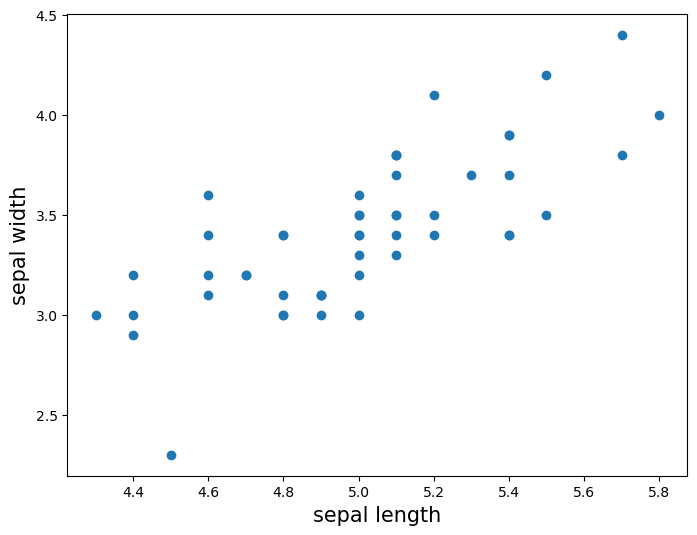

In [8]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

df = pd.read_csv('iris_dataset.csv')
df.head()
df = df.iloc[:50][['sepal_length', 'sepal_width']]
plt.figure(figsize = (8, 6))

plt.scatter(df['sepal_length'], df['sepal_width'])
plt.xlabel("sepal length", fontsize = 15)
plt.ylabel("sepal width", fontsize = 15);

100: [3.78430986]


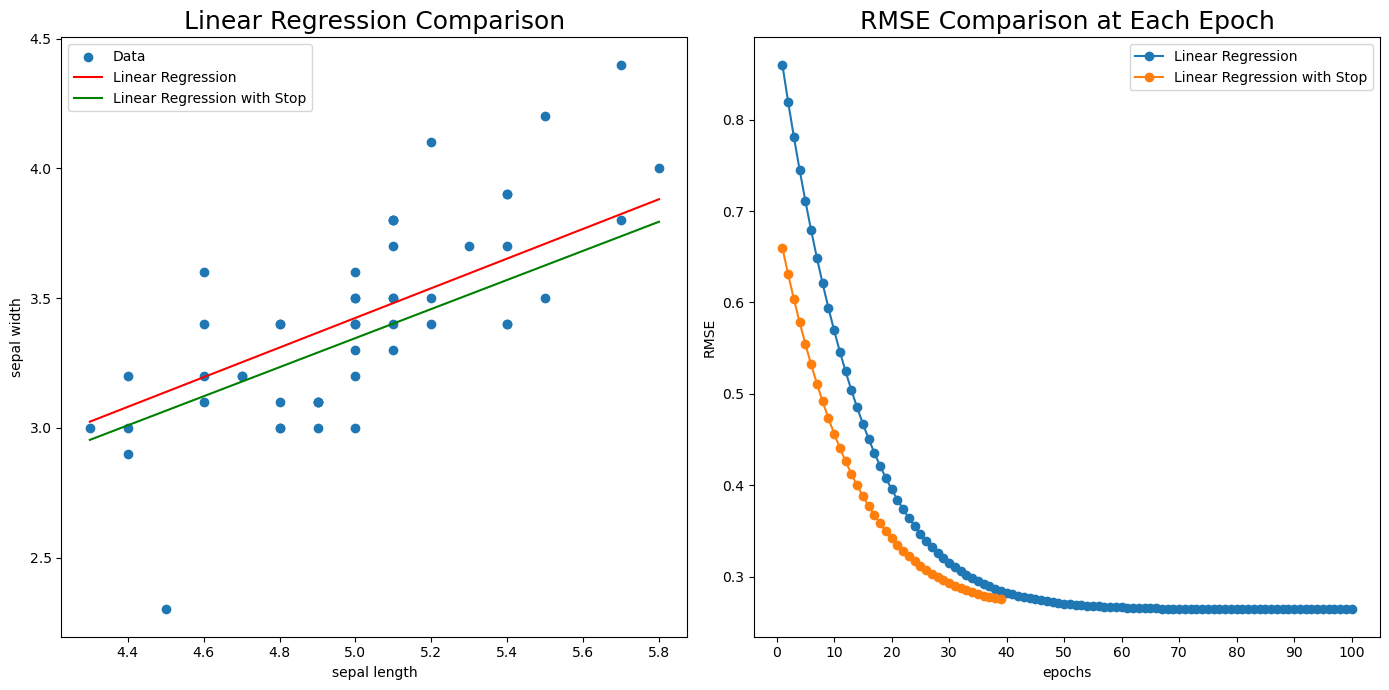

In [9]:

class MyLinReg(object):
    """
    A class used to represent a single artificial neuron for linear regression. 

    ...

    Attributes
    ----------
    activation_function : function
        The activation function applied to the preactivation term.

    theta : numpy.ndarray
        The weights and bias of the single neuron. The last entry being the bias. 
        This attribute is created when the fit method is called.

    errors : list
        A list containing the mean squared error computed after each iteration 
        of batch gradient descent. 

    Methods
    -------
    fit(self, X, y, alpha = 0.001, epochs = 10)
        Iterates the batch gradient descent algorithm through each sample
        a total of epochs number of times with learning rate alpha. The data 
        consists of the feature vector X and the associated target y. 

    predict(self, X)
        Uses the weights and bias, the feature vector X, and the 
        activation_function to make a prediction on each data instance. 
    """
    def __init__(self, activation_function, random_seed=None):
        self.activation_function = activation_function
        self.random_seed = random_seed
        self.random_state = np.random.RandomState(seed=random_seed) if random_seed is not None else None

    def fit(self, X, y, alpha = 0.001, epochs = 10):
        self.theta = np.random.rand(X.shape[1] + 1) if self.random_state is not None else np.random.rand(X.shape[1] + 1)
        self.errors = []
        n = X.shape[0]

        for _ in range(epochs):
            errors = 0
            sum_1 = 0
            sum_2 = 0
            for xi, yi in zip(X, y):
                sum_1 += (self.predict(xi) - yi)*xi
                sum_2 += (self.predict(xi) - yi)
                errors += ((self.predict(xi) - yi)**2)
            self.theta[:-1] -= 2*alpha*sum_1/n
            self.theta[-1] -= 2*alpha*sum_2/n
            self.errors.append(errors/n)
            
        return self

    def predict(self, X):
        weighted_sum = np.dot(X, self.theta[:-1]) + self.theta[-1]
        return self.activation_function(weighted_sum)
    
class MyLinReg_with_stop(object):

    def __init__(self, activation_function, random_seed=None):
        self.activation_function = activation_function
        self.random_seed = random_seed
        self.random_state = np.random.RandomState(seed=random_seed) if random_seed is not None else None

    def fit(self, X, y, alpha = 0.001, epochs = 100):
        self.theta = np.random.rand(X.shape[1] + 1, ) if self.random_state is not None else np.random.rand(X.shape[1] + 1)
        self.errors = []
        n = X.shape[0]

        for _ in range(epochs):
            errors = 0
            sum_1 = 0
            sum_2 = 0
            for xi, yi in zip(X, y):
                sum_1 += (self.predict(xi) - yi)*xi
                sum_2 += (self.predict(xi) - yi)
                errors += ((self.predict(xi) - yi)**2)
            self.theta[:-1] -= 2*alpha*sum_1/n
            self.theta[-1] -= 2*alpha*sum_2/n
            self.errors.append(errors/n)
            
            if len(self.errors) > 2 and (self.errors[-2] - self.errors[-1]) / self.errors[-2]  < 0.01:
                print(str(epochs) + ": " + str(errors))
                break
            
        return self

    def predict(self, X):
        weighted_sum = np.dot(X, self.theta[:-1]) + self.theta[-1]
        return self.activation_function(weighted_sum)
    
def identity_function(z):
        return z
    
X = df[['sepal_length']].to_numpy()
y = df[['sepal_width']].to_numpy()
random_seed = 42

# Define your models and their parameters
model1 = MyLinReg(identity_function, random_seed)
model1.fit(X, y, alpha=0.001, epochs=100)

model2 = MyLinReg_with_stop(identity_function, random_seed)
model2.fit(X, y, alpha=0.001, epochs=100)

# Generate domain values for plotting
domain_x = np.linspace(np.min(X), np.max(X), 2)
domain_y1 = model1.predict(domain_x.reshape(-1, 1))
domain_y2 = model2.predict(domain_x.reshape(-1, 1))

# Create a single figure with two subplots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 7))

# Subplot 1: Scatter plot of data points and regression lines
ax1.scatter(X, y, label="Data")
ax1.plot(domain_x, domain_y1, color="red", label="Linear Regression")
ax1.plot(domain_x, domain_y2, color="green", label="Linear Regression with Stop")
ax1.set_xlabel("sepal length")
ax1.set_ylabel("sepal width")
ax1.set_title("Linear Regression Comparison", fontsize=18)
ax1.legend()

# Subplot 2: RMSE at each epoch
ax2.plot(range(1, len(model1.errors) + 1), np.sqrt(model1.errors), marker="o", label="Linear Regression")
ax2.plot(range(1, len(model2.errors) + 1), np.sqrt(model2.errors), marker="o", label="Linear Regression with Stop")
ax2.set_xlabel("epochs")
ax2.set_ylabel("RMSE")
ax2.set_xticks(range(0, len(model1.errors) + 1, 10))
ax2.set_title("RMSE Comparison at Each Epoch", fontsize=18)
ax2.legend()

# Display the combined plot
plt.tight_layout()
plt.show()

In [10]:

import time

# Initialize variables to store execution times
training_time_model1 = 0
training_time_model2 = 0

# Define the number of training runs to get more accurate timing results
num_runs = 10

for _ in range(num_runs):
    # For model1
    start_time = time.time()
    model1.fit(X, y, alpha=0.001, epochs=100)
    end_time = time.time()
    training_time_model1 += end_time - start_time
    
    # For model2
    start_time = time.time()
    model2.fit(X, y, alpha=0.001, epochs=100)
    end_time = time.time()
    training_time_model2 += end_time - start_time

# Calculate the average training time for each model
average_training_time_model1 = training_time_model1 / num_runs
average_training_time_model2 = training_time_model2 / num_runs

# Print the average training times
print(f"Average Training Time for Model 1: {average_training_time_model1:.4f} seconds")
print(f"Average Training Time for Model 2: {average_training_time_model2:.4f} seconds")

# Rest of your code for visualization (same as previous)
# ...

# Display the combined plot
plt.tight_layout()
plt.show()

100: [3.71854426]
100: [3.95330013]
100: [3.53616804]
100: [3.66569552]
100: [3.98189245]
100: [3.85872467]
100: [3.8408857]
100: [3.68357297]
100: [3.7016541]
100: [3.75898446]
Average Training Time for Model 1: 0.0440 seconds
Average Training Time for Model 2: 0.0263 seconds


<Figure size 640x480 with 0 Axes>

# Part 1 (b)

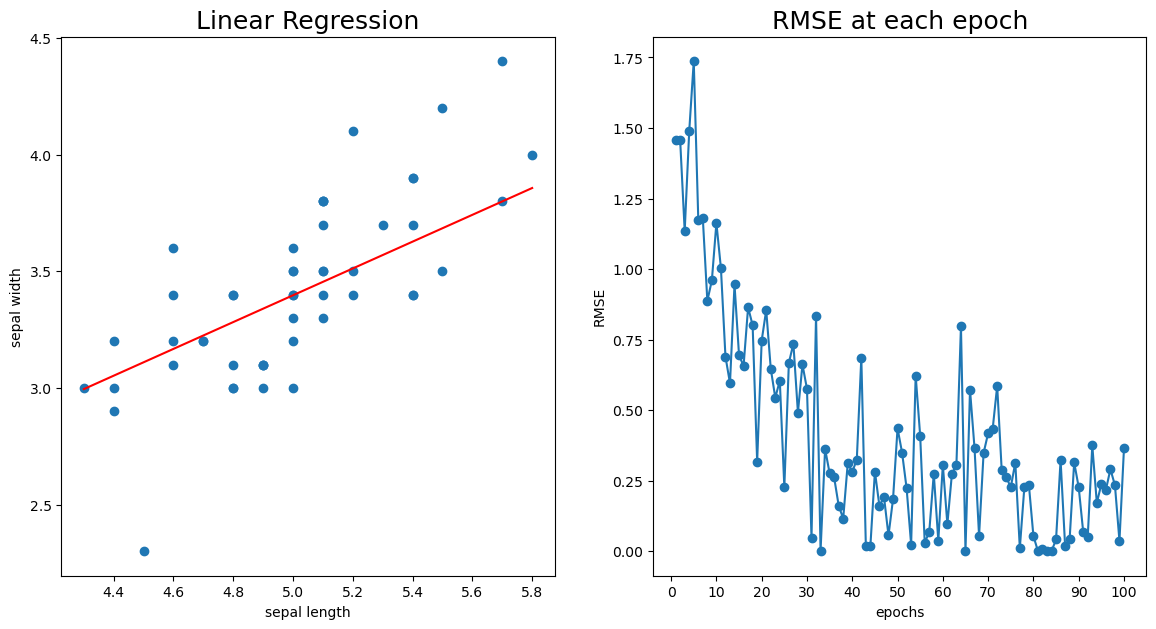

In [11]:
 #Task (b) - Switching to Stochastic Gradient Descent (SGD)*
import random
class MyLinReg_Sto(object):

    def __init__(self, activation_function):
        self.activation_function = activation_function

    def fit(self, X, y, alpha = 0.001, epochs = 100):
        self.theta = np.random.rand(X.shape[1] + 1)
        self.errors = []
        n = X.shape[0]

        for _ in range(epochs):
            error = 0
            random_index = random.randint(0, n - 1)
            xi = X[random_index]
            yi = y[random_index]

            prediction = self.predict(xi)
            diff = prediction - yi
            error += diff ** 2

            # Update weights using stochastic gradient descent
            self.theta[:-1] -= 2 * alpha * diff * xi
            self.theta[-1] -= 2 * alpha * diff
            self.errors.append(error)
            
        return self

    def predict(self, X):
        weighted_sum = np.dot(X, self.theta[:-1]) + self.theta[-1]
        return self.activation_function(weighted_sum)
    
model = MyLinReg_Sto(identity_function)
model.fit(X, y, alpha = 0.001, epochs = 100)

domain_x = np.linspace(np.min(X), np.max(X), 2)
domain_y = model.predict(domain_x.reshape(-1, 1))

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14,7))

ax1.scatter(X, y)
ax1.plot(domain_x, domain_y, color = "red")
ax1.set_xlabel("sepal length")
ax1.set_ylabel("sepal width")
ax1.set_title("Linear Regression", fontsize = 18)

ax2.plot(range(1, len(model.errors) + 1), 
         np.sqrt(model.errors),
         marker = "o")
ax2.set_xlabel("epochs")
ax2.set_ylabel("RMSE")
ax2.set_xticks(range(0, len(model.errors) + 1, 10))
ax2.set_title("RMSE at each epoch", fontsize = 18);

# Part 3

In [12]:


# Import the data file mtcars.csv. The goal is to determine two or three
# continuous numerical variables that can be used to predict mpg (miles per gallon)
# using multiple linear regression. You can use sklearn or custom class; batch GD,
# SGD, or mini-batch SGD; and scaling.

import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error

#Loading the mtcars dataset
mtcars = pd.read_csv("mtcars.csv")

#Selecting suitable continuous numerical variables that is 'cyl', 'hp', and 'wt as the target variable
X = mtcars[['cyl', 'hp', 'wt']]
y = mtcars['mpg']

#Split the data into training and testing sets, 20% of test_training dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#Scale the features using StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

#Training a multiple linear regression model using sklearn LinearRegression
multi_linear_reg_model = LinearRegression()
multi_linear_reg_model.fit(X_train_scaled, y_train)

#Evaluating and Predicting the model's performance on the training set
train_predictions = multi_linear_reg_model.predict(X_train_scaled)
train_rmse = np.sqrt(mean_squared_error(y_train, train_predictions))

#Predictions on the testing set
test_predictions = multi_linear_reg_model.predict(X_test_scaled)
test_rmse = np.sqrt(mean_squared_error(y_test, test_predictions))

print(f"RMSE on the training data: {train_rmse}")
print(f"RMSE on the testing data: {test_rmse}")

w = multi_linear_reg_model.coef_
b = multi_linear_reg_model.intercept_

#Evaluating weight and bias from the trained model
print("weight :",w,"\nbias : ", b)

RMSE on the training data: 2.2612974158570274
RMSE on the testing data: 2.716479005609972
weight : [-1.73098146 -1.06477448 -2.94603393] 
bias :  20.168
